Step 1- Data preperation/cleaning
Tools- Pandas and Jupyter Notebook

In [1]:
#1.1-Load the data
import pandas as pd

df = pd.read_csv('customer_shopping_data.csv')

In [2]:
#1.2-Inspect the data

df.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity


In [3]:
#basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
#summary statistics

df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
#1.3- Handle missing value 

df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [11]:
#1.4- Change the data-type for date colunm

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)



In [13]:
#1.5 Remove duplicates 

df.duplicated().sum()

0

In [16]:
#1.6 Creaating new feature/ column 

#Customer segmentation based on age group

bins = [18, 24, 34, 44, 54, 64, 70]
la = ['Young Adults','Young Professionals','Established Professionals','Middle-aged Adults','Pre-retirees','Early Retirees']

df['age_based_segmentation']= pd.cut(df['age'], bins=bins, labels=la, right=False)

In [17]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_based_segmentation
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,Young Professionals
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Young Adults
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,Young Adults
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Early Retirees
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Middle-aged Adults


In [18]:
#1.7- Removing outliers

import numpy as np

Q1= df['price'].quantile(.25)
Q3= df['price'].quantile(.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
uper = Q3 + 1.5*IQR

df = df[ (df['price'] >=lower)  & (df['price'] <=uper)]

In [19]:
#1.8 -Saving cleaned data 
df.to_csv('cleaned_customer_shopping_dataset.csv', index=False)


Step 2 - Exploratory Data Analysis (EDA)

In [20]:
#2.1 - Import all importent libraries and load the data

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_customer_shopping_dataset.csv')

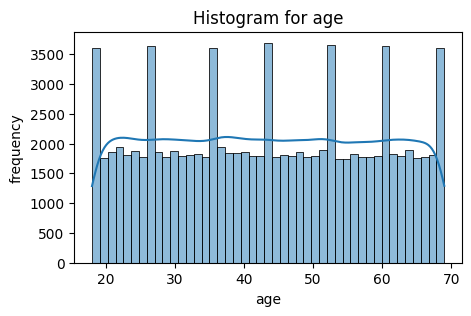

In [57]:
#2.2 - Univariate Analysis 
# on age
plt.figure(figsize=(5,3))
sns.histplot(df['age'], bins = 45, edgecolor='black', kde=True)
plt.title('Histogram for age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()


#inference - all age groups comtibute equaly...

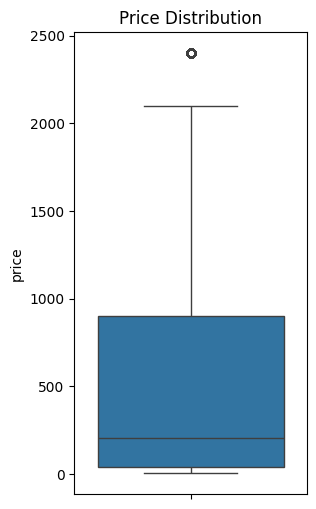

In [56]:
# on price
plt.figure(figsize=(3,6))
sns.boxplot(df['price'])
plt.title('Price Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

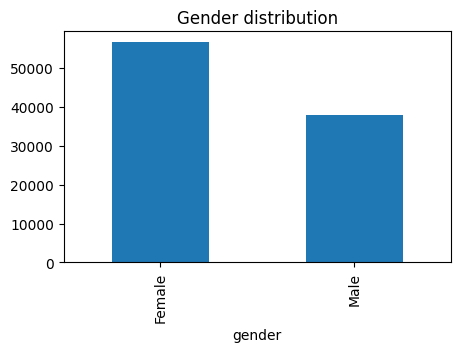

In [53]:
# Category based plots

#on gender
plt.figure(figsize=(5,3))
df['gender'].value_counts().plot(kind = 'bar')
plt.title('Gender distribution')
plt.show

#Infernce - More female customers compared to male customers 

<function matplotlib.pyplot.show(close=None, block=None)>

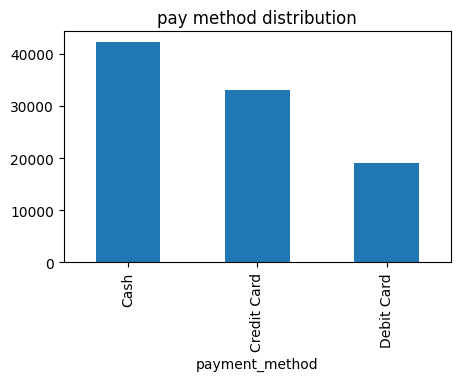

In [52]:
# on payment method 
plt.figure(figsize=(5,3))
df['payment_method'].value_counts().plot(kind = 'bar')
plt.title('pay method distribution')
plt.show

#Inferrence - cash > Credit Card > Debit card

Text(0.5, 1.0, 'age based distribution')

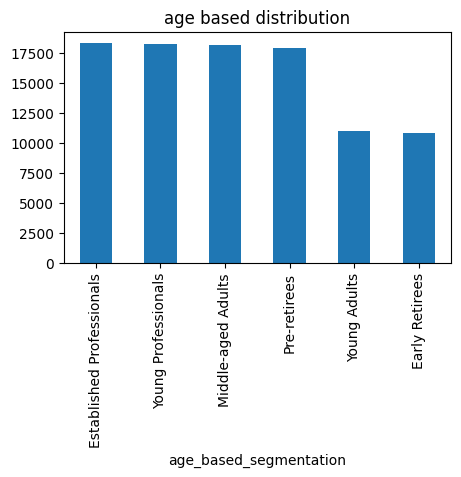

In [51]:
# on age based segmentation
plt.figure(figsize=(5,3))
df['age_based_segmentation'].value_counts().plot(kind = 'bar')
plt.title('age based distribution')


In [ ]:
# 2.3 - Bivariate Analysis

